In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import parser
import numpy as np
import sklearn
import scipy
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

In [1]:
def timedif(row):
    dt_obj1 = parser.parse(row['rundate'])
    dt_obj2 = parser.parse(row['stopdate'])
    return (dt_obj2-dt_obj1).total_seconds()/60
def intime(row):
    dt_obj1 = parser.parse(row['indate'].split()[0]+' 00:00:00')
    dt_obj2 = parser.parse(row['indate'])
    return (dt_obj2-dt_obj1).total_seconds()/3600
def indatetime(row, start):
    dt_obj1 = parser.parse(start)
    dt_obj2 = parser.parse(row['indate'])
    return (dt_obj2-dt_obj1).total_seconds()/3600

In [22]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', 100)  # or 199
pd.options.display.expand_frame_repr = False
date = "07_12"
paths = [".\\run_info\\broadwell_"+date+".csv", ".\\run_info\\cascade_lake_"+date+".csv", ".\\run_info\\skylake_"+date+".csv"]
names = ["broadwell", "cascade_lake", "skylake"]
dfs = [0]*len(paths)
for i in range(len(paths)):
    dfs[i] = pd.read_csv(paths[i],error_bad_lines=False, sep=";")
    dfs[i]['stopdate'].replace('', np.nan, inplace=True)
    dfs[i].dropna(subset=['stopdate'], inplace=True)
    dfs[i]["exec"] = dfs[i].apply (lambda row: timedif(row), axis=1)
    dfs[i]["intime"] = dfs[i].apply (lambda row: intime(row), axis=1)
    dfs[i]["indatetime"] = dfs[i].apply (lambda row: indatetime(row, dfs[i]['indate'].min()), axis=1)

C:\Users\alexm\AppData\Local\Temp\ipykernel_16880\3857979660.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfs[i] = pd.read_csv(paths[i],error_bad_lines=False, sep=";")
C:\Users\alexm\AppData\Local\Temp\ipykernel_16880\3857979660.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfs[i] = pd.read_csv(paths[i],error_bad_lines=False, sep=";")
C:\Users\alexm\AppData\Local\Temp\ipykernel_16880\3857979660.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfs[i] = pd.read_csv(paths[i],error_bad_lines=False, sep=";")


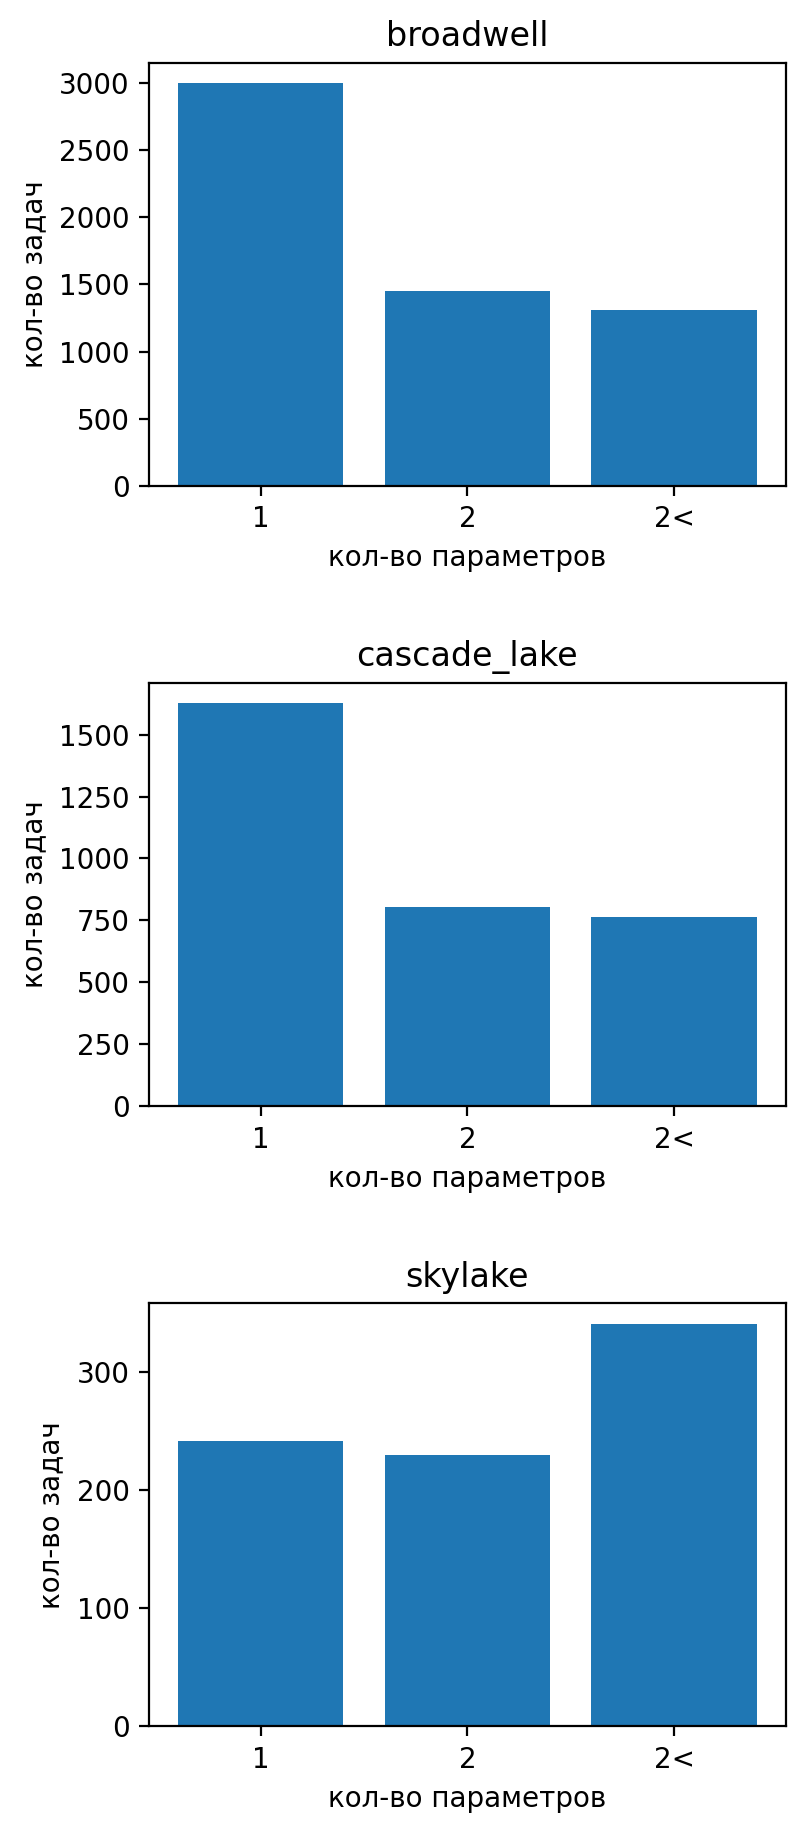

In [3]:
fig, axs = plt.subplots(len(paths), 1, figsize=(5,10))
fig.tight_layout(pad=5.0)
for i in range(len(paths)):
    df = dfs[i]
    cmds = {}
    for s in df['cmdline']:
        cnt = len(s.split())
        if cnt>2:
            cnt = 3
        if cnt not in cmds:
            cmds[cnt] = 1
        else:
            cmds[cnt] += 1
    s_cmds = {c:cmds[c] for c in sorted(cmds)}
    axs[i].bar([f'{i}' if i != 3 else '2<' for i in s_cmds.keys()], s_cmds.values(),linewidth=100)
    axs[i].set_title(names[i])
    axs[i].set_ylabel("кол-во задач")
    axs[i].set_xlabel("кол-во параметров")
    


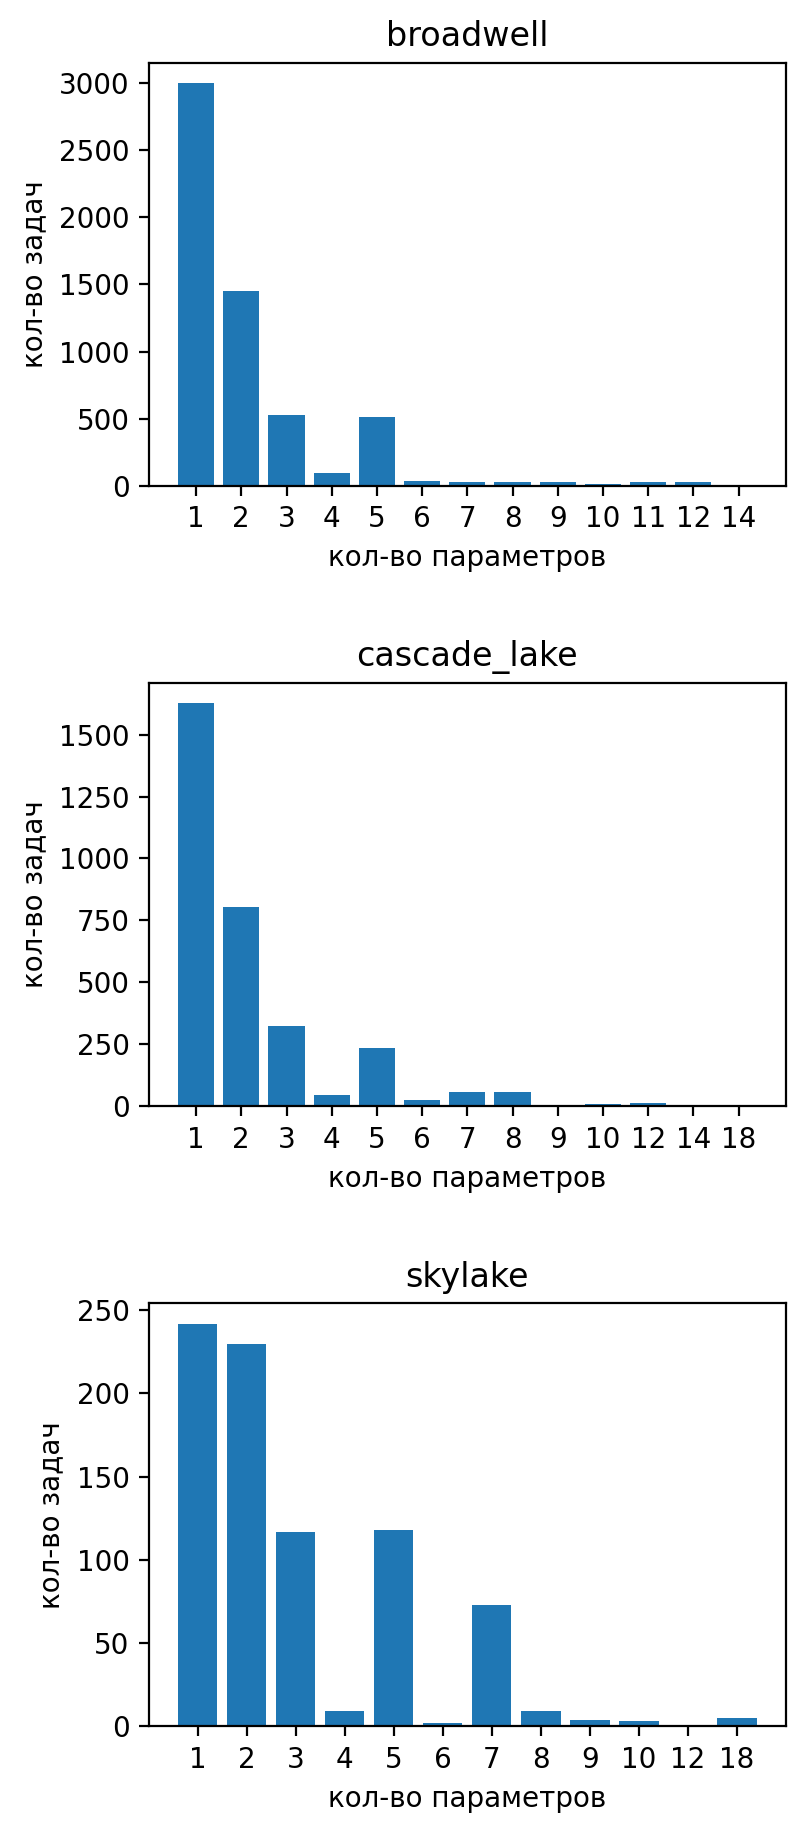

In [4]:
fig, axs = plt.subplots(len(paths), 1, figsize=(5,10))
fig.tight_layout(pad=5.0)
for i in range(len(paths)):
    df = dfs[i]
    cmds = {}
    for s in df['cmdline']:
        cnt = len(s.split())
        if cnt not in cmds:
            cmds[cnt] = 1
        else:
            cmds[cnt] += 1
    s_cmds = {c:cmds[c] for c in sorted(cmds)}
    axs[i].bar([f'{i}' for i in s_cmds.keys()], s_cmds.values(),linewidth=100)
    axs[i].set_title(names[i])
    axs[i].set_ylabel("кол-во задач")
    axs[i].set_xlabel("кол-во параметров")

In [5]:
for i in range(len(paths)):
    df = dfs[i]
    cmds = {}
    for s in df['cmdline']:
        for ss in s.split():
            for sss in ss.split('/'):
                if sss not in cmds:
                    cmds[sss] = 1
                else:
                    cmds[sss] += 1
    s_cmds ={k: v for k, v in sorted(cmds.items(), key=lambda item: -item[1]) if cmds[k] > 200 and not "home" in k and not "pstorage" in k and '' != k and '.'!=k} 
    print(s_cmds)
    print('\n')

{'vasp_std': 945, 'aizel': 930, 'oivt8': 926, 'vikhrov': 926, 'bin': 744, 'oivt21': 685, 'photon1': 679, 'orca-run': 671, '..': 621, 'calc': 621, 'oivt23': 620, 'znt': 620, 'lustre': 612, 'lstore': 612, 'vasp': 573, 'dlpoly.x': 571, 's.pavlov': 568, 'free_energy': 568, 'runorca': 568, 'run': 481, 'soft': 474, '-in': 471, 'md_cpu': 463, 'md': 463, 'ti72_nb22_zr6': 409, '-log': 351, '3d': 348, 'phys1': 334, 'lmp_intel_cpu_intelmpi': 325, 'iofran1': 278, 'sasha': 255, 'vasp.6.1.0': 240, 'pw.x': 233, 'nakurch': 233, 'iofran3': 226, 'vasp.5.4.4': 219, 'oivt20': 218, 'klimkov': 209, 'pic_2d_openmp': 208, 'bin_intel_2021': 208, 'launchsimulation': 207, 'work': 204}


{'vasp_std': 785, 'bin': 726, '..': 657, 'photon1': 538, 'orca-run': 530, 'vasp': 500, 'runorca': 465, 'soft': 283, 'nakurch': 250, 'ibhf7': 215, 'glebushek': 215, 'vasp6': 215, 'bin_intel_2021': 212, 'pw.x': 204, 'vasp.6.1.0': 202}


{'bin': 327, 'photon1': 201}




806  -  568  -  316
544  -  463  -  40
1072  -  310  -  14
148  -  255  -  78
1032  -  233  -  69
1160  -  209  -  24
487  -  174  -  1
1126  -  154  -  1
1135  -  139  -  54
1123  -  114  -  28
1172  -  113  -  3
1088  -  93  -  5
1217  -  92  -  56
371  -  91  -  10
1129  -  84  -  26
865  -  82  -  43
1113  -  81  -  30
1175  -  78  -  53
374  -  77  -  5
1124  -  73  -  40
448  -  72  -  4
60  -  65  -  2
1222  -  65  -  9
632  -  64  -  1
1197  -  63  -  36
848  -  62  -  12
913  -  57  -  44
1055  -  55  -  1
993  -  54  -  50
160  -  54  -  23
1058  -  53  -  1
401  -  51  -  5
1195  -  51  -  2
1028  -  50  -  42
623  -  45  -  8
1143  -  45  -  13
1168  -  43  -  2
1215  -  42  -  3
1159  -  41  -  8
2  -  37  -  9
904  -  37  -  22
1194  -  35  -  8
392  -  34  -  30
1180  -  33  -  21
49  -  33  -  27
1220  -  33  -  1
560  -  30  -  1
1117  -  28  -  10
1155  -  27  -  1
1023  -  27  -  7
1219  -  26  -  1
968  -  25  -  25
1186  -  25  -  1
822  -  25  -  2
1208  -  25  - 

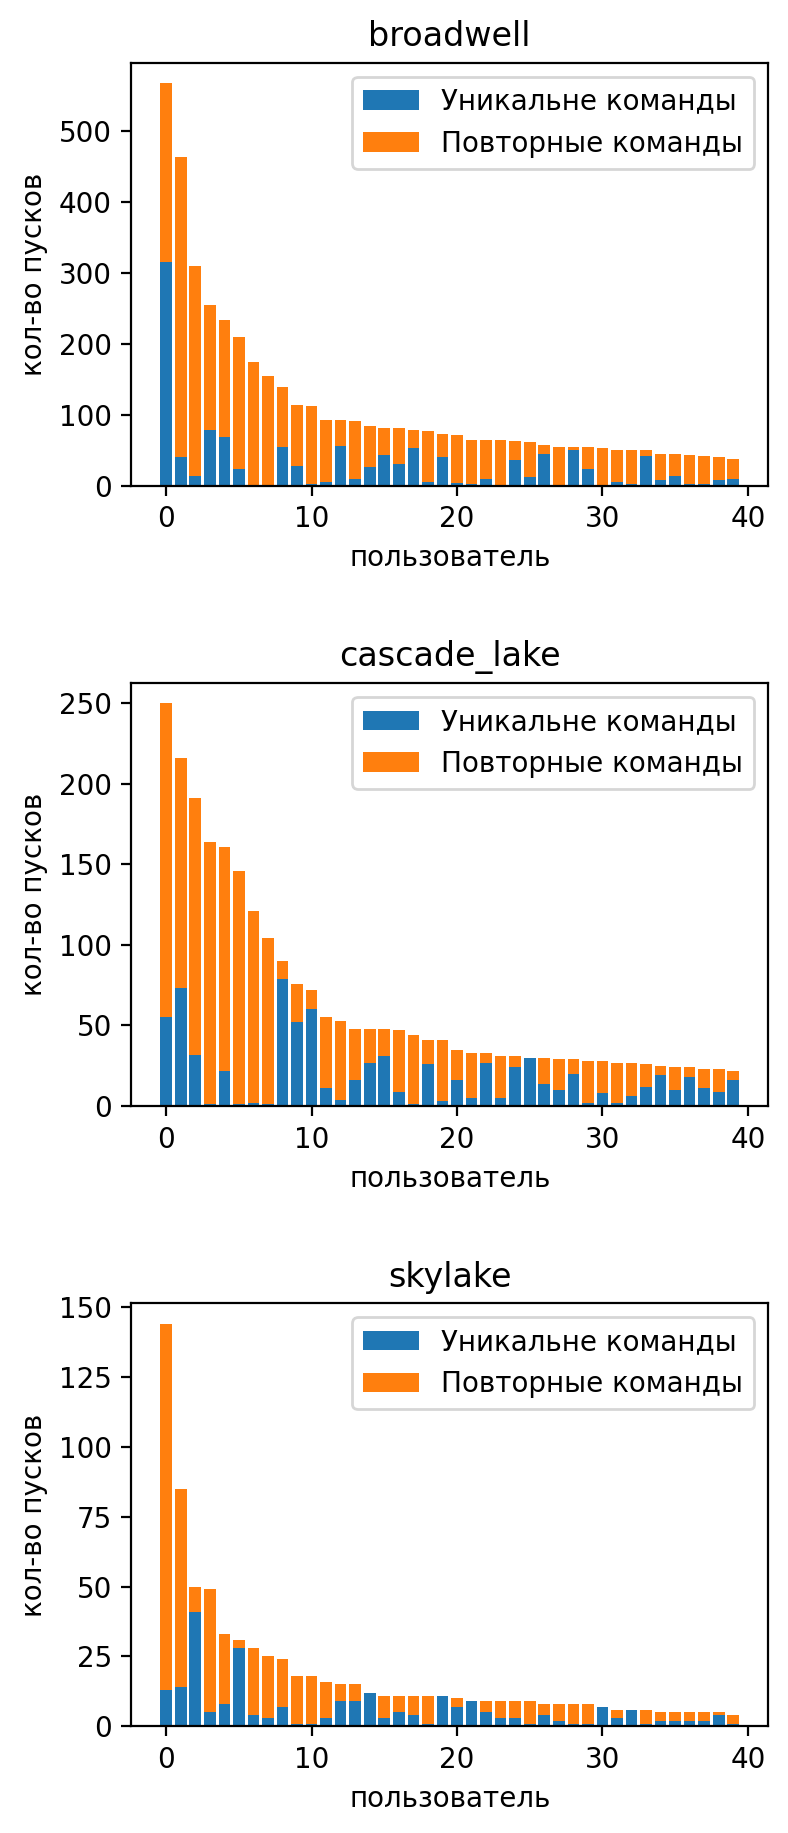

In [6]:
fig, axs = plt.subplots(len(paths), 1, figsize=(5,10))
fig.tight_layout(pad=5.0)
s_cmds_arr = []
for i in range(len(paths)):
    df = dfs[i]
    cmds = {}
    for index, row in df.iterrows():
            uid = row['userid']
            if uid not in cmds:
                cmds[uid] = [row['cmdline']]
            else:
                cmds[uid].append(row['cmdline'])
    s_cmds ={k: v for k, v in sorted(cmds.items(), key=lambda item: -len(item[1]))} 
    s_cmds_arr.append(s_cmds)
    for x in s_cmds:
        print(x, " - ", len(s_cmds[x]), " - ", len(set(s_cmds[x])))
    v1 = [ len(set(s_cmds[x])) for x in s_cmds]
    v2 = [ len(s_cmds[x]) - len(set(s_cmds[x])) for x in s_cmds]
    v1,v2 = v1[:40], v2[:40]
    
    axs[i].bar([i for i in range(len(v1))], v1 ,linewidth=100, label = "Уникальне команды")
    axs[i].bar([i for i in range(len(v1))], v2, bottom=v1 ,linewidth=100,  label = "Повторные команды")
    axs[i].set_title(names[i])
    axs[i].set_ylabel("кол-во пусков")
    axs[i].set_xlabel("пользователь")
    axs[i].legend()

In [7]:
num = 0
s_cmds = s_cmds_arr[num]
df = dfs[num]
v3 = {x:[] for y in s_cmds for x in set(s_cmds[y])}
for index, row in df.iterrows():
    v3[row['cmdline']].append(row['exec'])
v4 = {k:v3[k] for k in v3 if len(v3[k])>2}
y = 0
a = 0
for cmd in v4:
    t = np.std(np.array(v4[cmd]))
    a+=1
    if (t <= 300):
        y+=1
print(y/a)

0.8387850467289719


In [82]:
df = dfs[0]
#print(df.loc[df['userid'] == 806].loc[:,['cmdline', 'exec','nproc','ntime','taskname']])
print(df['nproc']/32)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       1.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29      10.0
30       1.0
31       1.0
32       1.0
33       1.0
34       1.0
35       1.0
36       1.0
37       1.0
38       1.0
39       1.0
40       1.0
41       1.0
42       1.0
43       6.0
44       8.0
45       2.0
46       1.0
47       1.0
48       4.0
49       8.0
50      10.0
51       2.0
52       4.0
53       4.0
54       4.0
55       4.0
56       4.0
57       4.0
58       4.0
59       4.0
60       5.0
61       1.0
62       2.0
63       1.0
64       1.0
65       1.0
66       2.0
67       1.0
68       1.0
69       1.0
70       1.0
71       1.0
72       8.0
73       1.0
74       1.0
75       1.0
76      40.0

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = dfs[0]
df = df.drop(columns=['indate','taskname', 'exittype', 'cmdline', 'rundate', 'stopdate', 'userid'])
df = df.dropna()
df = df._get_numeric_data()
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

      feature       VIF
0       nproc  1.473306
1       ntime  1.197547
2         gid  8.126790
3       orgid  1.870561
4        exec  1.469774
5      intime  5.775748
6  indatetime  4.311426


C:\Users\alexm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\alexm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


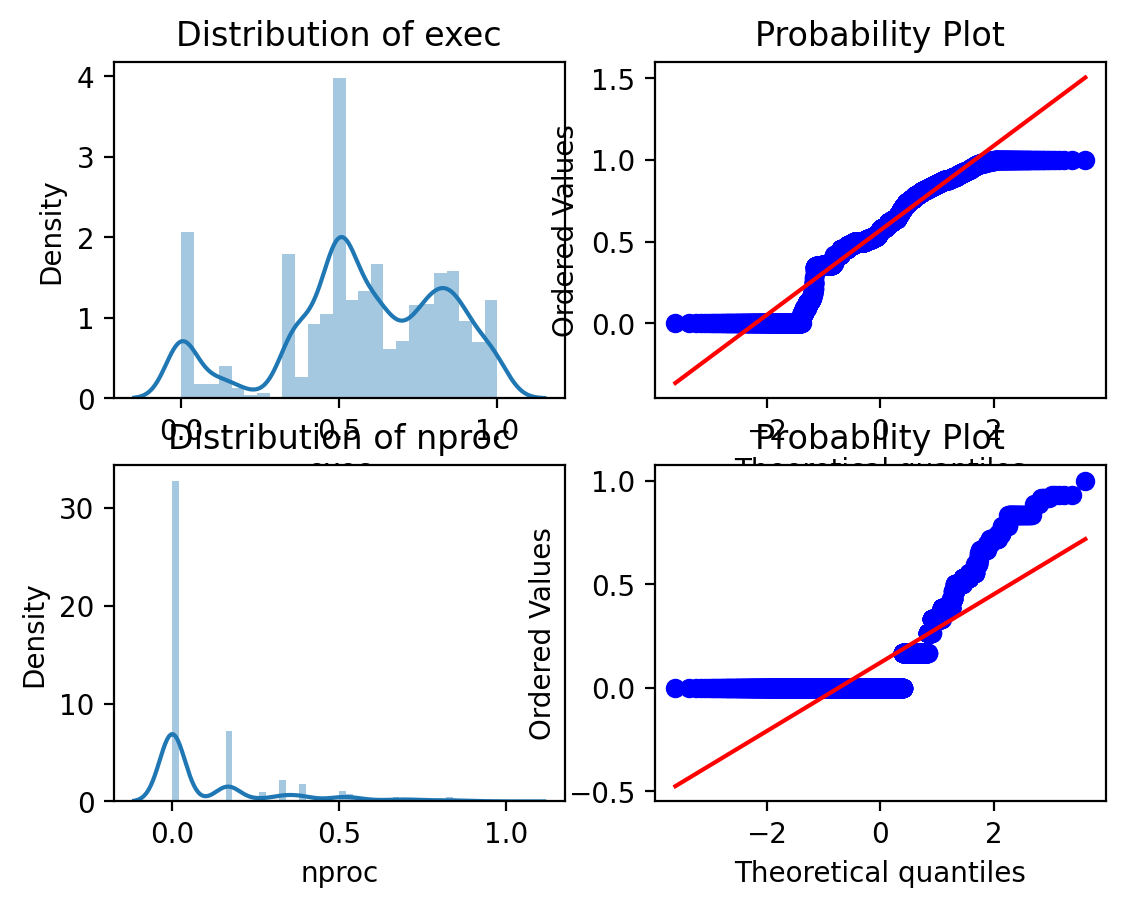

In [90]:
test_percent = 0.2
df = dfs[0]
df = df._get_numeric_data()
df['nproc']=df['nproc']/32
df = df.loc[df['ntime']<=1440]
df = df.loc[df['nproc']<=2000]
df = df.loc[df['exec']<df['ntime']]
dfdel = df.loc[df['ntime'] - df['exec'] <= 0.05]
df = df.loc[df['ntime'] - df['exec'] > 0.05]
df = df.sort_values(by=['indatetime'])
df = df.drop(columns=['indatetime', 'exittype'])
df['nproc'] = np.log(df['nproc'])

df['exec'] = np.log(df['exec'])
dfdel['exec'] = np.log(dfdel['exec'])

col_to_dict = ['userid', 'gid', 'orgid']
dicts = {'userid':{}, 'gid':{}, 'orgid':{}}
for col in col_to_dict:
    for d in df[col]:
        if d in dicts[col]:
            dicts[col][d]+=1
        else:
            dicts[col][d]=1
    df[col] = [list(dicts[col]).index(d) for d in df[col]]

col_to_norm = ['nproc','ntime','userid','gid','orgid','exec','intime']
for col in col_to_norm:
    if col in ['ntime', 'exec']:
        dfdel[col] = (dfdel[col] - df[col].min()) / (df[col].max() - df[col].min())
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
# probability plot
ax1 = plt.subplot(221)
sns.distplot(df['exec']).set_title("Distribution of exec")
ax1 = plt.subplot(222)
res = scipy.stats.probplot(df['exec'], plot=plt)
ax1 = plt.subplot(223)
sns.distplot(df['nproc']).set_title("Distribution of nproc")
ax1 = plt.subplot(224)
res = scipy.stats.probplot(df['nproc'], plot=plt)

In [54]:
X = df.drop(columns=['exec'])
y = df.loc[:,['userid', 'exec']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_percent, shuffle=False)

userdict = {}
for u in X_train['userid']:
    if u in userdict:
        userdict[u]+=1
    else:
        userdict[u]=1
        
for u in X_test['userid']:
    if u not in userdict:
        userdict[u]=0
        
X_train = X_train.loc[[userdict[user] > 3 for user in X_train['userid']]]
X_test = X_test.loc[[userdict[user] > 3 for user in X_test['userid']]]
y_train = y_train.loc[[userdict[user] > 3 for user in y_train['userid']]]
y_test = y_test.loc[[userdict[user] > 3 for user in y_test['userid']]]
y_test = y_test.drop(columns=['userid'])
y_train = y_train.drop(columns=['userid'])

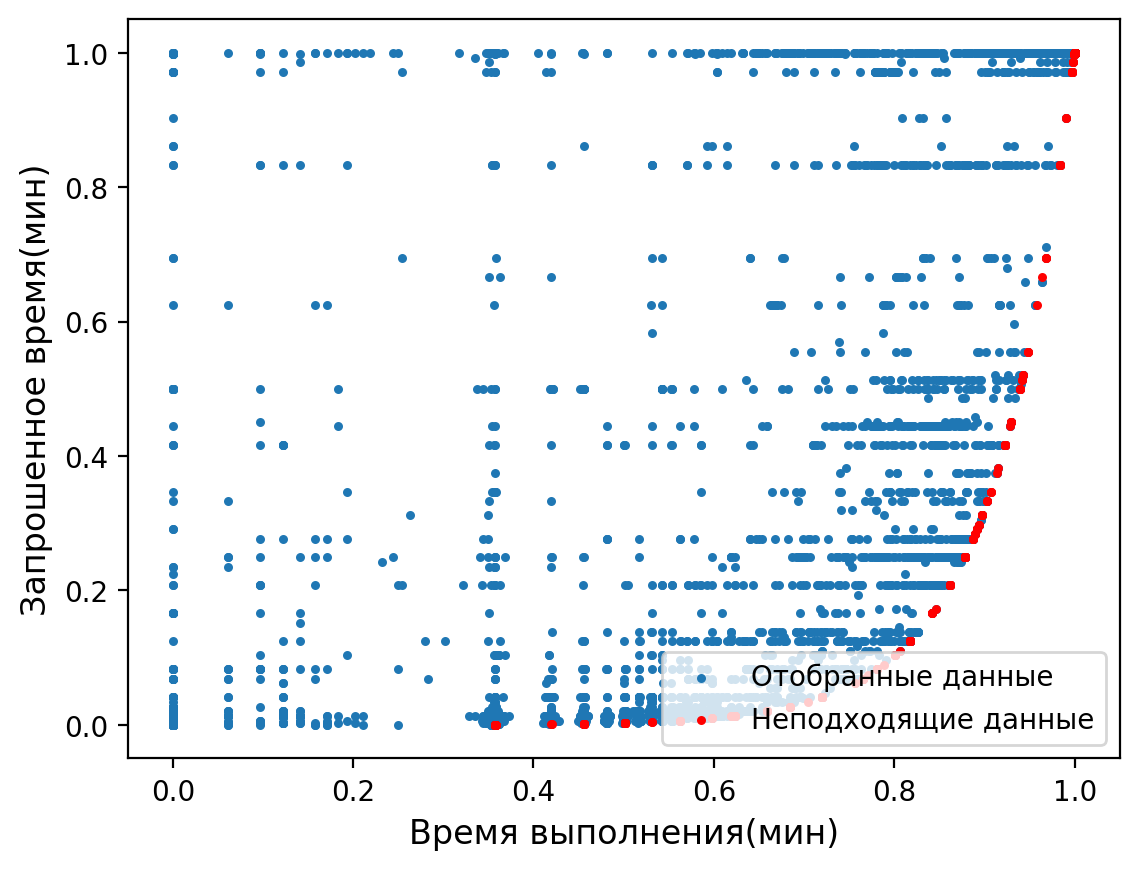

In [64]:
plt.figure()
plt.scatter(df['exec'], df['ntime'], s=5, label='Отобранные данные')
plt.scatter(dfdel['exec'], dfdel['ntime'], s=5, c='red', label='Неподходящие данные')
plt.ylabel('Запрошенное время(мин)', fontsize=12)
plt.xlabel('Время выполнения(мин)', fontsize=12)
plt.legend(loc='lower right')

In [98]:
ridge_param = {
    'solver':['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha': [ 1e-2, 0.25, 0.5, 0.75, 0.1 ,1.5, 1],
    'fit_intercept':[True, False],
    'normalize':[True, False]
}

tree_param = {
    "splitter":["best","random"],
    "max_depth" : [10, 15, 20, 25,30, 50],
    "min_samples_leaf":[2,3,4,5,6,7,8,9,10],
    "min_weight_fraction_leaf":[0, 0.001, 0.01, 0.1, 1],
    "max_features":["auto","log2","sqrt",None],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
    }

linear_param = {
    'fit_intercept':[True, False],
    'normalize':[True, False]
}

In [66]:
X_train

,nproc,ntime,userid,gid,orgid,intime
96,0.015873,0.444058,0.000000,0.000000,0.00000,0.692762
93,0.015873,0.444058,0.000000,0.000000,0.00000,0.692774
97,0.015873,0.444058,0.000000,0.000000,0.00000,0.694847
248,0.015873,0.444058,0.000000,0.000000,0.00000,0.694858
328,0.238095,1.000000,0.007353,0.015873,0.03125,0.970006
105,0.047619,1.000000,0.014706,0.031746,0.06250,0.980428
359,0.063492,0.416261,0.022059,0.047619,0.09375,0.319629
162,0.015873,0.416261,0.022059,0.047619,0.09375,0.391199
164,0.015873,0.416261,0.022059,0.047619,0.09375,0.391210
76,0.619048,1.000000,0.029412,0.063492,0.12500,0.415518


In [99]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold, GridSearchCV, ShuffleSplit
from sklearn import tree

models = {
    'linear':LinearRegression(),
    'ridge':Ridge(),
    'tree':tree.DecisionTreeRegressor()
    }

params = {
    'linear': linear_param,
    'ridge': ridge_param,
    'tree': tree_param
}

results = {}

for m in models:
    print(m)
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    search = GridSearchCV(models[m], params[m], scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
    result = search.fit(X_train, y_train)
    #models[m].fit(X_train, y_train)
    y_test[m] = result.predict(X_test)
    results[m] = result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

linear
Best Score: -0.16332906930611496
Best Hyperparameters: {'fit_intercept': True, 'normalize': True}
ridge
Best Score: -0.16332887049420086
Best Hyperparameters: {'alpha': 0.01, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}
tree
Best Score: -0.10244204582636536
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0, 'splitter': 'best'}


C:\Users\alexm\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.10989752 -0.11347406 -0.10949875 ... -0.1699631          nan
         nan]
  warnings.warn(


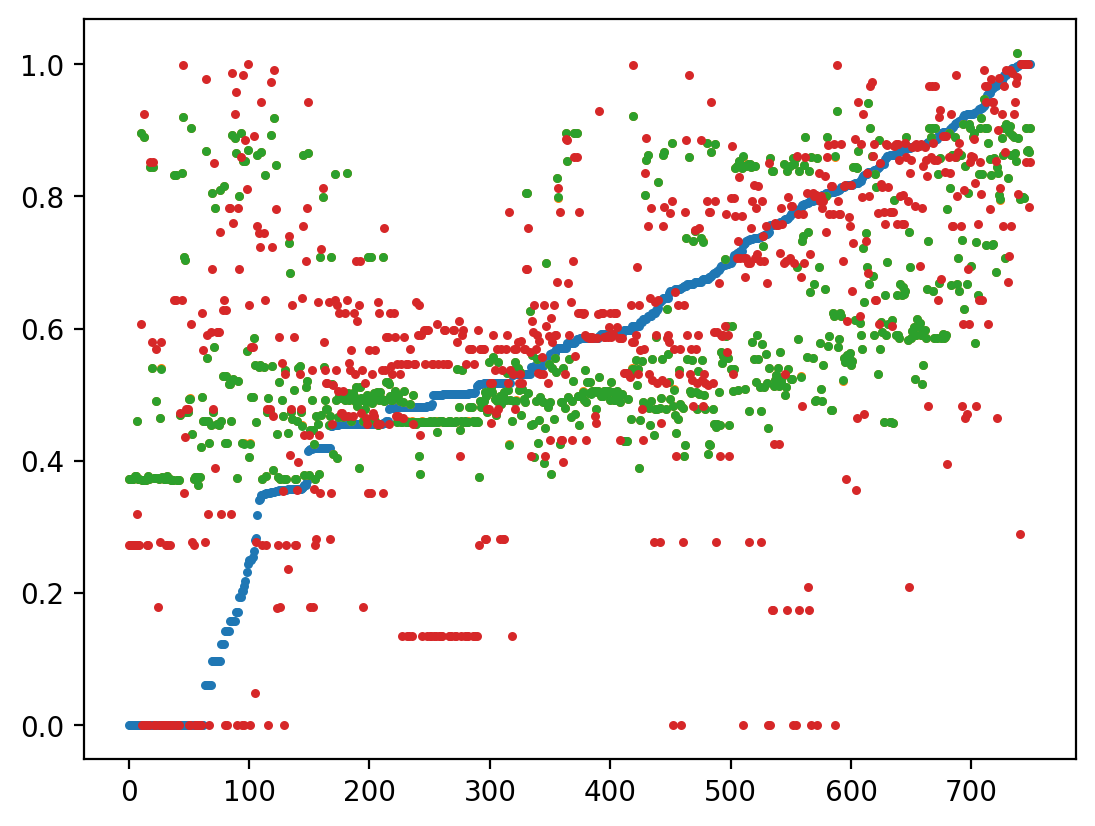

In [100]:
y = y_test.sort_values(by=['exec'])
plt.figure()
x = range(len(y['exec']))
plt.scatter(x, y['exec'], s=5, label='real')
for m in models:
    plt.scatter(x, y[m], s=5, label=m)


In [94]:
print(X_train.describe())
#X_train.max()
best = tree.DecisionTreeRegressor(**(results['tree'].best_params_))
best.fit(X_train, y_train)
#tree.plot_tree(best)
best.feature_importances_

             nproc        ntime       userid          gid        orgid       intime
count  3557.000000  3557.000000  3557.000000  3557.000000  3557.000000  3557.000000
mean      0.028613     0.248115     0.320555     0.293452     0.214480     0.573930
std       0.080140     0.338309     0.242101     0.244262     0.230326     0.248967
min       0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.009729     0.088235     0.095238     0.031250     0.432924
50%       0.000000     0.041001     0.264706     0.174603     0.156250     0.603845
75%       0.015873     0.416261     0.529412     0.412698     0.312500     0.751187
max       1.000000     1.000000     0.911765     0.920635     0.906250     1.000000


array([0.03826349, 0.48474014, 0.05507112, 0.03519611, 0.07628226,
       0.31044688])